In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random 

from IPython.display import display, clear_output
import time




class World():

    def __init__(self, r = 50, c = 50, jobs = [(30,30), (45,5), (5,45)], people = {}, people_lst = [], pop = 10, inf_pop = 2, uniform = True):
        '''Initializes the world with the following attributes:
        r,c are rows and columns of the world
        anti_b_lst is a list of the strengths of the anti-virus, default is random
        unform decides whether the anti-virus is equally distributed
        '''
        self.r = r
        self.c = c
        # Use a uniform layer of antivirus over the board
        self.jobs = jobs
        #self.bac = {}
        #self.bac_mat = np.zeros((r, c))

    def draw(self):
        '''Draws the virus matrix'''
        pass
        #plt.imshow()
        #plt.imshow(self.world_mat, origin='lower', aspect='equal', cmap='Greys')

In [13]:
import random
import numpy as np

class WorldNode:
    
    def __init__(self):
        self.key = 0
        self.people = {}
        
    def move_forward(self):
        ''' Give everyone in the room a chance to get sick. Each sick person has
            a level of contagiousness which represents the probability of them
            infecting a person that comes near them. The contagiousness should be
            some function of the time that the person has been sick (maybe 1/n or such).
            
            We model the probability of a person being infected as the union of interactions
            with sick people in the room as follows: '''
        threat = 0
        for k in self.people:
            if self.people[k].sick:
                thread += self.people[k].get_contagiousness()
        for k in self.people:
            if not self.people[k].sick:
                if random.random() < threat:
                    self.people[k].infect()
                    
    def add_person(self, p):
        self.people[self.key] = p
        self.key += 1
        
    def remove_person(self, key):
        del self.people[key]
        
class NodeType:
    
    def __init__(self, name, exit_nodes, exit_probs):
        ''' name is the name of this type of a node, e.g. home, and
            exit_nodes is a list of nodes that can be moved to from a node
            of this type. E.g. exit_nodes for "home" might look like ["work", "school"],
            while exit_nodes for "work" might look like ["home", "restaurant"]. 
            exit_probs are the probabilities corresponding to each exit node. '''
        self.name = name
        self.exit_nodes = exit_nodes
    
        
class WorldGen:
    
    def __init__(self, seed=123, num_nodes=5, node_types=["work", "school"]):
        ''' node_types is a list of NodeType. '''
        self.edges = np.zeros(shape=(num_nodes, num_nodes))
        # Initialize the graph randomly, but constrained by node_types 
        
        

        
        
        
    

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random 

from IPython.display import display, clear_output
import time


class human():
    world = World();

    def decriment_world(self):
        self.world.incriment_time()
    
    def draw_world(self):
        self.world.draw()
    
    def reset_world(self):
        self.world = grid()

    
    def __init__(self, x = 0, y = 0,
                 state='healthy', immunity = 0.9):
        self.x = np.random.randint(0,self.world.r)
        self.y = np.random.randint(0,self.world.c)
        self.home = (self.x,self.y)
        #self.nodes = nodes
        self.timer = np.random.randint(0,100,1)
#         self.job_timer = job_timer
#         self.job_timer_initial = job_timer
#         self.home_timer = 0
#         self.home_timer_initial = home_timer


        if immunity:
            self.immunity = immunity
        else:
            self.immunity = random.uniform(0,1)
        states = ['healthy','Symptoms','No_Symptoms']
        self.health = state
        self.job = self.world.jobs[random.randint(0,len(self.world.jobs)-1)]
        
            
    def go_to_job(self):
        
        
        if self.x != self.job[1]:
            delta_x = self.job[1] - self.x
            if delta_x > 0:
                self.x += 1
            elif delta_x < 0:
                self.x -= 1
                
        if self.y != self.job[0]:
            delta_y = self.job[0] - self.y
            if delta_y > 0:
                self.y += 1
            elif delta_y < 0:
                self.y -= 1

            
    def go_home(self):
        
        if self.x != self.home[1]:
            delta_x = self.home[1] - self.x
            if delta_x > 0:
                self.x += 1
            elif delta_x < 0:
                self.x -= 1
                
        if self.y != self.home[0]:
            delta_y = self.home[0] - self.y
            if delta_y > 0:
                self.y += 1
            elif delta_y < 0:
                self.y -= 1

    
    def on_grid(self, x, y):
        '''Checks if coordinates given (x,y) are valid locations of the grid's dimensions (r,c)'''
        return x >= 0 and y >= 0 and x < self.world.c and y < self.world.r
            
    def infect(self, surrounding_people, infected_dict):
        '''Checks surroundings for a person to infect. If a person is found, roll to see if infection is successful.
        If so, change instance of that person to be "infected"'''
        for person in surrounding_people:
            if person != self and person.health == "healthy":
                roll = random.uniform(0,1)
                if roll > person.immunity:
                    person.health = "Symptoms"
                    infected_dict["Symptoms"] += 1
                    infected_dict["healthy"] -= 1
                    break
        
        
    def iterate(self, people_dict):
        #self.go_to_job()
        if self.timer < 25 or self.timer >= 50 and self.timer < 75:
            self.go_to_job()
        if self.timer >= 25 and self.timer <50 or self.timer >= 75:
            self.go_home()
        self.timer += 1
        if self.timer > 100:
            self.timer = 0
        
#         if self.home_timer == 0:
#             self.go_to_job()
#            #self.home_timer = self.home_timer_initial
            
#         elif self.job_timer == 0:
#             self.go_home()
#             self.job_timer = self.job_timer_initial
        
#         if (self.x, self.y) == self.home:
#             self.home_timer -= 1
            

#         elif (self.x, self.y) == self.job:
#             self.job_timer -= 1
            
    def go_to_node(self, node_coordinates, timer):
        
        delta_x = node_coordinates[1] - self.x
        if delta_x > 0:
            self.x += 1
        elif delta_x < 0:
            self.x -= 1
                
        delta_y = node_coordinates[0] - self.y
        if delta_y > 0:
            self.y += 1
        elif delta_y < 0:
            self.y -= 1
            
            

        
    def check_near(self, people_dict):
        for p in people_dict:
            if p != self and (people_dict[p] == people_dict[self]):
                return True
            else:
                return False
                              
            
    def check_near1(self, people_dict):
        rev_multidict = {}
        for key, value in people_dict.items():
            rev_multidict.setdefault(value, set()).add(key)
        for key, values in rev_multidict.items():
            if len(values) > 1:
                return True
            else:
                return False

                    
    def draw(self):
        if self.health == 'healthy':
            color = 'g'
        if self.health == 'Symptoms':
            color = 'r'
        if self.health == 'No_Symptoms':
            color = 'y'
        plt.scatter(self.x, self.y, color=color)



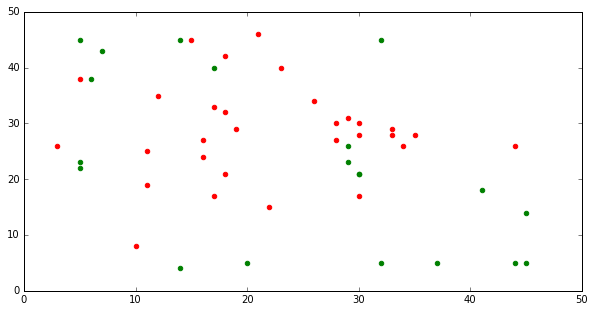

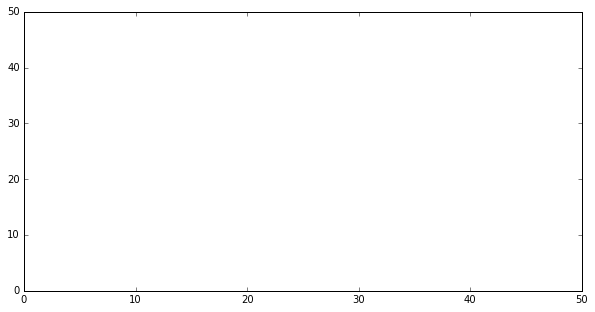

In [21]:
def check_common_location(people_dict):
    '''Function that keeps track of the people that share a common location. 
    Input: people_dict, dictionary with key = instance of person, value = location of person
    output: rev_multidict, dictionary with key as a common location, value as a list of people inhabiting that location
    common_loc, a list of locations that more than one person shares'''
    rev_multidict = {}
    for key, value in people_dict.items():
        rev_multidict.setdefault(value, set()).add(key)
    common_locs = [key for key, values in rev_multidict.items() if len(values) > 1]
    common_people = [values for key, values in rev_multidict.items() if len(values) > 1]
    return common_locs, rev_multidict



'''
pop = population
inf_pop = infected population 
people: list of human instances
people_dict: dictionary with key as a person instance, value as the person's location
infected_dict: dictionary with key as the human's health (i.e. "healthy" or "Symptoms", the value as the count of how many
peopel with those symptoms
'''
pop = 50
inf_pop = 5
people = []
people_dict = {}
infected_dict = {"healthy":pop-inf_pop, "Symptoms":inf_pop}
fig, ax = plt.subplots(figsize =(10,5))
iterations = 100

'''initialize'''
for i in range(pop):
    if i < inf_pop:
        people.append(human(state='Symptoms'))
    if i >= inf_pop:
        people.append(human(state='healthy', immunity = 0.5))
    person = people[i]
    people_dict[person] = (person.x,person.y)
        
print(infected_dict)
#print(infected_dict, people_dict)


time = np.arange(0,iterations)
symptom_array = np.zeros(iterations)
healthy_array = np.zeros(iterations)


'''Iterate'''
for i in range(iterations):
    if infected_dict["Symptoms"] == pop:
        break
    people[0].draw_world();
    common_locs, rev_multidict = check_common_location(people_dict)
    
    '''Loops through each person in list, people; each person "iterates", i.e. moves to their node.
    If that person is infected, they go through an extra method, infect, which looks for other healthy humans
    in the same location and rolls to change their health state.'''
    symptom_array[i] = infected_dict["Symptoms"]
    healthy_array[i] = infected_dict["healthy"]
    for p in people:
        p.iterate(people_dict);
        if p.health != "healthy" and (p.x,p.y) in common_locs:
            #print(rev_multidict[(p.x,p.y)])
            p.infect(rev_multidict[(p.x,p.y)], infected_dict)
        p.draw();
        people_dict[p] = (p.x, p.y)
    clear_output(wait=True); # Clear output for dynamic display
    display(fig);            # Reset display
    fig.clear();             # Prevent overlapping and layered plots
    #time.sleep(.01);      # Sleep for a fraction of a second to allow animation to catch up
    plt.xlim(0,50);
    plt.ylim(0,50);

#print(infected_dict)


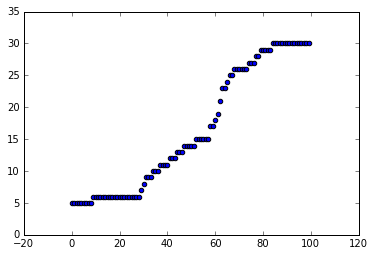

In [25]:
#plt.plot(time,healthy_array)
plt.scatter(time,symptom_array)

a = -8.65796813395e-05 , b = 0.0142893387491, c = -0.324467333162, d = 6.81627562908


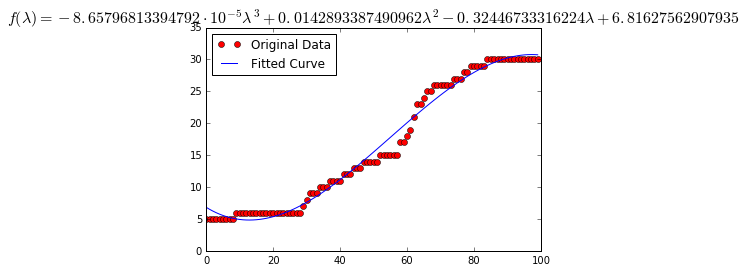

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym

"""
Generate some data, let's imagine that you already have this. 
"""
x = time
y = symptom_array

"""
Plot your data
"""
plt.plot(x, y, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

"""
Use sympy to generate the latex sintax of the function
"""
xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

In [30]:
p = np.polyfit(time,healthy_array, 2)
print(p)
symptom_array

[ -1.43225607e-03  -1.82119040e-01   4.72577053e+01]


array([  5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   7.,   8.,   9.,   9.,
         9.,  10.,  10.,  10.,  11.,  11.,  11.,  11.,  12.,  12.,  12.,
        13.,  13.,  13.,  14.,  14.,  14.,  14.,  14.,  15.,  15.,  15.,
        15.,  15.,  15.,  17.,  17.,  18.,  19.,  21.,  23.,  23.,  24.,
        25.,  25.,  26.,  26.,  26.,  26.,  26.,  26.,  27.,  27.,  27.,
        28.,  28.,  29.,  29.,  29.,  29.,  29.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.])

# LOOK AT THIS FOR CURVE FITTING

[ 0.47242167  5.95926446]


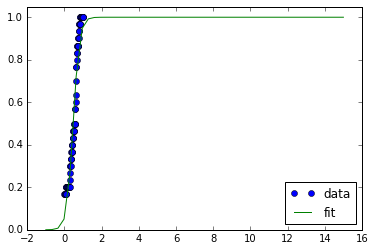

In [36]:
import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

xdata = time/max(time) #np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = symptom_array/max(symptom_array) #np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [19]:
# def check_s(self,people_dict):
#     for p in people_dict:
#         if p != self and (people_dict[p] == people_dict[self]):
#             return True
#         else:
#             return False
    

# people = []
# people_dict = {}
# #fig, ax = plt.subplots(figsize =(10,5))

# pop = 20
# inf_pop = 2
# for i in range(pop):
#     if i < inf_pop:
#         people.append(human(state='Symptoms'))
#     if i >= inf_pop:
#         people.append(human(state='healthy'))
#     person = people[i]
#     people_dict[person] = (person.x,person.y)
    
# #print(people_dict)
# for i in range(35):
#     #people[0].draw_world();
#     #locs = list(people_dict.values())
    
#     for p in people:
#         p.iterate(people_dict)
#         people_dict[p] = (p.x, p.y)
#         if check_s(p, people_dict) == True:
#             pass
            
        

# #print(people_dict)


In [20]:
def check_common_location(people_dict):
    rev_multidict = {}
    for key, value in people_dict.items():
        rev_multidict.setdefault(value, set()).add(key)
#[key for key, values in rev_multidict.items() if len(values) > 1]
    common_locs = [key for key, values in rev_multidict.items() if len(values) > 1]
    common_people = [values for key, values in rev_multidict.items() if len(values) > 1]
    return common_locs, rev_multidict

    



people = []
people_dict = {}
#fig, ax = plt.subplots(figsize =(10,5))

pop = 20
inf_pop = 2
for i in range(pop):
    if i < inf_pop:
        people.append(human(state='Symptoms'))
    if i >= inf_pop:
        people.append(human(state='healthy', immunity = 0.1))
    person = people[i]
    people_dict[person] = (person.x,person.y)


for i in range(55):
    #people[0].draw_world();
    common_locs, loc_dict = check_common_location(people_dict)
    for p in people:
        p.iterate(people_dict)
        if p.health != "healthy" and (p.x,p.y) in common_locs:
            p.infect(loc_dict[(p.x,p.y)])
            
        #p.draw();
        people_dict[p] = (p.x, p.y)
    
count = 0
for a in people_dict:
    if a.health == "Symptoms":
        count += 1
        
print(count)
        
### TO DO:
#write infect code:
#for each infected person in a common area:
#    infect

TypeError: infect() missing 1 required positional argument: 'infected_dict'

In [ ]:
# rev_multidict = {}
# for key, value in people_dict.items():
#     rev_multidict.setdefault(value, set()).add(key)
# common_locs = [key for key, values in rev_multidict.items() if len(values) > 1] #key = location, value = humans in location
# common_people = [values for key, values in rev_multidict.items() if len(values) > 1]
# #print("common locs", common_locs)
# for l in common_locs:
#     print(l, rev_multidict[l])
    
#print("common people", common_people)
# for lst in common_people:
#     print()
#     for pers in lst:
#         print(pers)
        
#print("rev_multidict", rev_multidict)


In [ ]:
class Virus():
    
    def __init__(self, x, y, grid, infectability = 0.1, lethality = 0.1, mutationrate = 0.1, immunity = 0.5, inhost = False):
        '''Constructs instance of virus with the following attributes:
        infectability: how infectuous the virus is
        lethality: the virus's ability to kill
        mutationrate: chance that virus mutates
        inhost: if True, this virus is affecting a person'''
        self.x = x
        self.y = y
        self.world = grid
        self.infectability = infectability
        self.lethality = lethality
        self.immunity = immunity
        self.mutationrate = mutationrate
        self.inhost = inhost
        
    def check_surroundings(self):
        '''Method used to check surroundings. '''
        surroundings = {}
        result = [0,0,0,0]
        for x in range(self.x - 1, self.x + 2):
            for y in range(self.y - 1, self.y + 2):
                if (not (x == self.x and y == self.y)) and self.on_grid(x, y):
                    
                    # 1 is a placeholder for person; ideally I could access an instance of a person in this position
                    if (x,y) in self.world.people and self.world.people[(x,y)].health != "healthy":
                        near_person = True
                        person_x = x
                        person_y = y
                        person_instance = self.world.people[(x,y)]
                        result = [person_x, person_y, near_person, person_instance]
                        
                        
        return result
        
        
    def on_grid(self, x, y):
        '''Checks if coordinates given (x,y) are valid locations of the grid's dimensions (r,c)'''
        return x >= 0 and y >= 0 and x < self.world.c and y < self.world.r
    
    def infect(self):
        '''Checks surroundings for a person to infect. If a person is found, roll to see if infection is successful.
        If so, change instance of that person to be "infected"'''
        result = self.check_surroundings()
        if result[2]:
            roll = random.uniform(0,1)
            if roll < self.infectability:
                # infect the instance of a person in this position
                coordinates = (result[0],result[1])
                # p = person_dict[coordinates] <- access the person
                # p.infected = True <- change state of person
            
    def move(self):
        '''looks for open position in grid and assigns virus's x and y coordinates to that position'''
        open_pos = []
        for x in range(self.x - 1, self.x + 2):
            for y in range(self.y - 1, self.y + 2):
                if not (x == self.x and y == self.y):
                    # Allow the virus to divide to the cell at x, y if the point
                    # is on the grid and no existing virus lives at x, y.
                    if self.on_grid(x, y) and self.world.bac_mat[y][x] == 0:
                        open_pos.append([x,y])
                        
        random.shuffle(open_pos)
        #print(open_pos)
        self.x = open_pos[0][0]
        self.y = open_pos[0][1]


    
    def mutate(self):
        '''Each immunity gene has a [rate] chance of mutating'''
        roll = random.uniform(0,1)
        if self.mutationrate > roll:
            new_attributes = [random.uniform(0,1) for _ in range(4)]
            self.infectability = new_attributes[0]
            self.lethality = new_attributes[1]
            self.mutationrate = new_attributes[2]
            self.immunity = new_attributes[3]
        #self.imm = [random.uniform(0, 1) if random.random() < self.mutationrate else current_val for current_val in self.imm]
        return self
        
    def die(self):
        '''Check if virus is immune to anti-virus; if virus doesn't pass check, it dies.'''   
        for i,j in zip(self.immunity, self.world.get_anti_bac(self.x)):
            if j > i:
                self.world.bac_mat[self.y][self.x] = 0
                del self.world.bac[(self.y, self.x)]
                return True
                
        return False
    
    
    def infected_iterate(self):
        '''Method that describes a virus actions inside the body. 
        Approach in one of two ways:
        1) virus stays "inside" person; i.e. shares location of the person, checks surroundings and infects surrounding
        2) delete instance of this virus, and all of the person-infecting-other-people interactions are within the 
        person class
        '''
        
        #1)
        #self.x = person.x
        #self.y = person.y
        result = check.surroundings()
        self.infect()
        
        #in case we account for dying people
        roll = random.uniform(0,1)
        if roll > self.lethality:
            self.world.bac_mat[self.y][self.x] = 0
            del self.world.bac[(self.y, self.x)] #placeholder for deleting person
        self.mutate()
   
    def iterate(self):
        '''
        How virus interacts;
        If the virus is in the host, it acts thru the "infected_iterate" method
        If the virus is not, it keeps moving and finds a person to infect
        '''
        
        if self.inhost == True:
            self.infected_iterate()
            
        else:
            #self.move()
            self.infect()
            self.mutate()
        


    def draw(self):
        '''Draws the virus and represents the colors based on the immunities'''
        plt.scatter(self.y, self.x)    
    
    